In [148]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_mcp_graph(routes, distance_matrix, plot_title="MCP Graph"):
    G = nx.DiGraph()

    colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

    for i in range(len(distance_matrix)):
        G.add_node(i)

    # Add edges based on the routes and distance matrix
    for idx, route in enumerate(routes):
        color = colors[idx % len(colors)]
        route = [0] + [node for node in route if node != 0] + [0]  # Include the depot at start and end
        for i in range(len(route) - 1):
            u, v = route[i], route[i+1]
            weight = distance_matrix[u-1][v-1]
            G.add_edge(u, v, color=color, weight=weight)

    # Use spring layout for better node positioning
    pos = nx.spring_layout(G, seed=42)

    # Draw the graph
    edges = G.edges(data=True)
    edge_colors = [e[2]['color'] for e in edges]
    edge_weights = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_color='lightgrey', node_size=500, font_size=10, font_color='black')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)
    plt.title(plot_title)
    plt.show()

In [149]:
def read_instances(file_name):
    with open(file_name, 'r') as file:
        lines = file.readlines()
        m = int(lines[0].strip())
        n = int(lines[1].strip())
        l = [int(i) for i in lines[2].strip().split()]
        s = [int(i) for i in lines[3].strip().split()]
        D = []
        for line in lines[4:]:
            D.append([int(i) for i in line.strip().split()])
        return m, n, l, s, D

m, n, l, s, D = read_instances('./Instances/inst01.dat')

In [150]:
!python mcp.py ./Instances/inst01.dat cp gecode 10 | head -n 1

[[1, 3, 4, 0, 0, 0], [2, 5, 6, 0, 0, 0]]


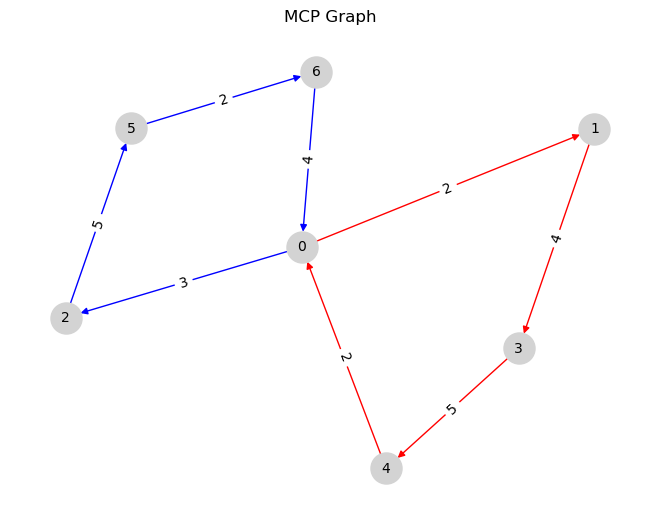

In [147]:
draw_mcp_graph([[1, 3, 4, 0, 0, 0], [2, 5, 6, 0, 0, 0]], D)

In [105]:
import os
import json 

directory_path = './res/MIP'
json_files = sorted([file for file in os.listdir('./res/MIP/') if file.endswith('.json')], key=lambda x: int(os.path.splitext(x)[0]))
all_json_data = []
header = ['ID']

for json_file in json_files:
    file_path = os.path.join(directory_path, json_file)
    with open(file_path, 'r', encoding='utf-8') as file:
        json_content = json.load(file)
        row_data = {}
        for key, value in json_content.items():
            solver_name = key.split('_')[-1].upper()
            if solver_name not in header:
                header.append(solver_name)
            row_data[f'{key}_obj'] = value.get('obj', None)
        all_json_data.append(row_data)
        
df = pd.DataFrame(all_json_data)
df.insert(0, 'ID', range(1, len(df) + 1))

latex_table = df.to_latex(index=False, column_format="c|ccccc", header=header)
latex_table = latex_table.replace('\\toprule\n', '').replace('\\bottomrule\n', '')

print(latex_table)

\begin{tabular}{c|ccccc}
ID & HIGHS & CBC & SCIP \\
\midrule
1 & 12 & 14 & 14 \\
2 & 226 & 226 & 226 \\
3 & 12 & 12 & 12 \\
4 & 220 & 220 & 220 \\
5 & 206 & 206 & 206 \\
6 & 226 & 322 & 322 \\
7 & 0 & 167 & 167 \\
8 & 186 & 186 & 186 \\
9 & 436 & 436 & 436 \\
10 & 244 & 244 & 244 \\
\end{tabular}

